# Case Study on Unsupervised Learning

### 1. Read the dataset on python environment.

In [1]:
#importing modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
wn = pd.read_csv('Wine.csv')
wn.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
#checking shape of dataset
wn.shape

(178, 13)

### preprocessing 

In [4]:
#checking missing values
wn.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [5]:
%whos

Variable   Type         Data/Info
---------------------------------
np         module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd         module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt        module       <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
sns        module       <module 'seaborn' from 'C<...>s\\seaborn\\__init__.py'>
warnings   module       <module 'warnings' from '<...>onda3\\lib\\warnings.py'>
wn         DataFrame         Alcohol  Malic_Acid <...>\n[178 rows x 13 columns]


In [6]:
wn.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

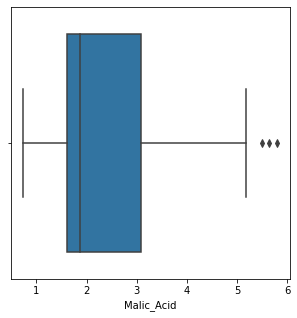

In [7]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(wn.Malic_Acid);

In [8]:
# finding different quartile values

Q1= np.percentile(wn['Malic_Acid'], 25, interpolation='midpoint')
Q2= np.percentile(wn['Malic_Acid'], 50, interpolation='midpoint')
Q3= np.percentile(wn['Malic_Acid'], 75, interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

1.605
1.8650000000000002
3.065


In [9]:
IQR = Q3-Q1                # assigning variable IQR which denotes inter quartile range.
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

-0.585
5.255


In [10]:
outlier=[]
for x in wn['Malic_Acid']:
    if ((x > up_lim) or (x < low_lim)):
        outlier.append(x)

In [11]:
outlier

[5.8, 5.51, 5.65]

In [12]:
ind1 = wn['Malic_Acid'] > up_lim             # finding index of these outliers.
wn.loc[ind1].index

Int64Index([123, 137, 173], dtype='int64')

In [13]:
#dropping outliers above upper limit
wn.drop([ 123, 137, 173], inplace= True)

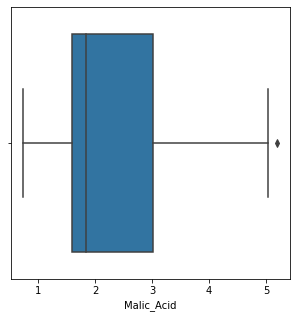

In [14]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(wn.Malic_Acid);

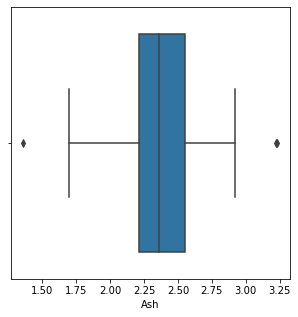

In [15]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(wn.Ash);

In [16]:
# finding different quartile values

Q1= np.percentile(wn['Ash'], 25, interpolation='midpoint')
Q2= np.percentile(wn['Ash'], 50, interpolation='midpoint')
Q3= np.percentile(wn['Ash'], 75, interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

2.21
2.36
2.5549999999999997


In [17]:
IQR = Q3-Q1                # assigning variable IQR which denotes inter quartile range.
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

1.6925000000000003
3.0724999999999993


In [18]:
outlier=[]
for x in wn['Ash']:
    if ((x > up_lim) or (x < low_lim)):
        outlier.append(x)

In [19]:
outlier

[3.22, 1.36, 3.23]

In [20]:
ind1 = wn['Ash'] > up_lim             # finding index of these outliers.
wn.loc[ind1].index


Int64Index([25, 121], dtype='int64')

In [21]:
ind1 = wn['Ash'] < low_lim             # finding index of these outliers.
wn.loc[ind1].index

Int64Index([59], dtype='int64')

In [22]:
wn.drop([25, 121, 59], inplace= True)

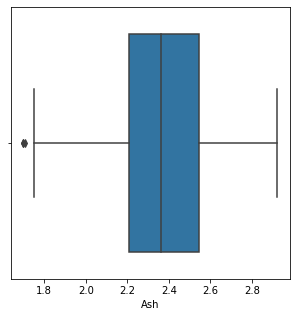

In [23]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(wn.Ash);

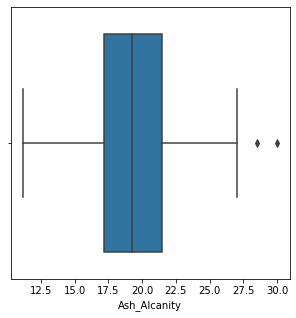

In [24]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(wn.Ash_Alcanity);

In [25]:
# finding different quartile values

Q1= np.percentile(wn['Ash_Alcanity'], 25, interpolation='midpoint')
Q2= np.percentile(wn['Ash_Alcanity'], 50, interpolation='midpoint')
Q3= np.percentile(wn['Ash_Alcanity'], 75, interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

17.15
19.25
21.5


In [26]:
IQR = Q3-Q1                # assigning variable IQR which denotes inter quartile range.
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

10.624999999999996
28.025000000000002


In [27]:
outlier=[]
for x in wn['Ash_Alcanity']:
    if ((x > up_lim) or (x < low_lim)):
        outlier.append(x)

In [28]:
outlier

[30.0, 28.5]

In [29]:
ind1 = wn['Ash_Alcanity'] > up_lim             # finding index of these outliers.
wn.loc[ind1].index

Int64Index([73, 127], dtype='int64')

In [30]:
wn.drop([73, 127], inplace= True)

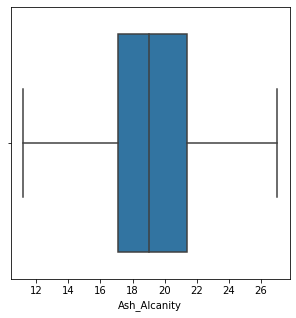

In [31]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(wn.Ash_Alcanity);

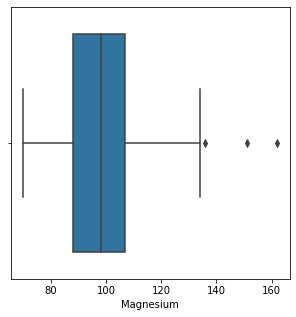

In [32]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(wn.Magnesium);

In [33]:
# finding different quartile values

Q1= np.percentile(wn['Magnesium'], 25, interpolation='midpoint')
Q2= np.percentile(wn['Magnesium'], 50, interpolation='midpoint')
Q3= np.percentile(wn['Magnesium'], 75, interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

88.0
98.0
107.0


In [34]:
IQR = Q3-Q1                # assigning variable IQR which denotes inter quartile range.
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

59.5
135.5


In [35]:
outlier=[]
for x in wn['Magnesium']:
    if ((x > up_lim) or (x < low_lim)):
        outlier.append(x)

In [36]:
outlier

[151, 136, 162]

In [37]:
ind1 = wn['Magnesium'] > up_lim             # finding index of these outliers.
wn.loc[ind1].index

Int64Index([69, 78, 95], dtype='int64')

In [38]:
wn.drop([69, 78, 95], inplace= True)

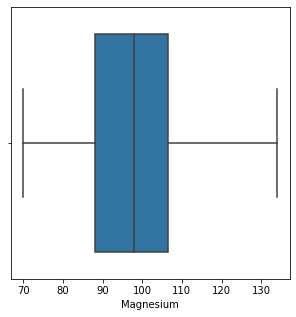

In [39]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(wn.Magnesium);

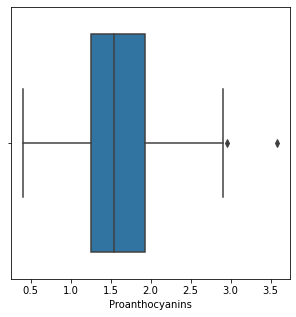

In [40]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(wn.Proanthocyanins);

In [41]:
# finding different quartile values

Q1= np.percentile(wn['Proanthocyanins'], 25, interpolation='midpoint')
Q2= np.percentile(wn['Proanthocyanins'], 50, interpolation='midpoint')
Q3= np.percentile(wn['Proanthocyanins'], 75, interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

1.25
1.54
1.9249999999999998


In [42]:
IQR = Q3-Q1                # assigning variable IQR which denotes inter quartile range.
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

0.23750000000000027
2.9374999999999996


In [43]:
outlier=[]
for x in wn['Proanthocyanins']:
    if ((x > up_lim) or (x < low_lim)):
        outlier.append(x)

In [44]:
outlier

[2.96, 3.58]

In [45]:
ind1 = wn['Proanthocyanins'] > up_lim             # finding index of these outliers.
wn.loc[ind1].index

Int64Index([14, 110], dtype='int64')

In [46]:
wn.drop([14,110], inplace= True)

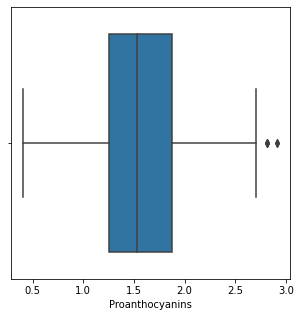

In [47]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(wn.Proanthocyanins);

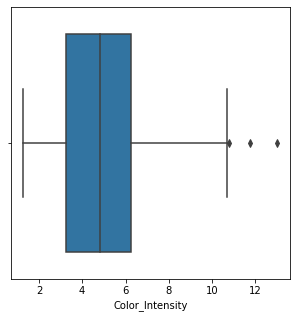

In [48]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(wn.Color_Intensity);

In [49]:
# finding different quartile values

Q1= np.percentile(wn['Color_Intensity'], 25, interpolation='midpoint')
Q2= np.percentile(wn['Color_Intensity'], 50, interpolation='midpoint')
Q3= np.percentile(wn['Color_Intensity'], 75, interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

3.27
4.8
6.25


In [50]:
IQR = Q3-Q1                # assigning variable IQR which denotes inter quartile range.
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

-1.1999999999999997
10.719999999999999


In [51]:
outlier=[]
for x in wn['Color_Intensity']:
    if ((x > up_lim) or (x < low_lim)):
        outlier.append(x)

In [52]:
outlier

[10.8, 13.0, 11.75]

In [53]:
ind1 = wn['Color_Intensity'] > up_lim             # finding index of these outliers.
wn.loc[ind1].index

Int64Index([151, 158, 159], dtype='int64')

In [54]:
wn.drop([151, 158, 159, 166], inplace= True)

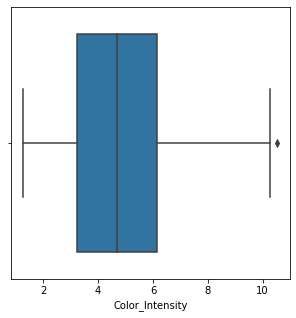

In [55]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(wn.Color_Intensity);

In [56]:
wn.shape

(161, 13)

Data is clean without null values and outliers are removed from dataset.

### Exploratory data analysis

In [57]:
wn.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,13.019565,2.304596,2.362174,19.291304,98.428571,2.285155,2.034658,0.359565,1.542174,4.979379,0.962273,2.628012,752.031056
std,0.806324,1.049584,0.241544,2.964823,12.408019,0.627430,0.977546,0.122354,0.515138,2.122279,0.225159,0.708700,318.957882
min,11.030000,0.740000,1.700000,11.200000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.540000,1.270000,278.000000
25%,12.370000,1.600000,2.220000,17.200000,88.000000,1.720000,1.220000,0.270000,1.240000,3.250000,0.790000,2.010000,500.000000
50%,13.050000,1.830000,2.360000,19.000000,97.000000,2.350000,2.140000,0.340000,1.530000,4.700000,0.980000,2.780000,675.000000
75%,13.690000,3.030000,2.530000,21.000000,106.000000,2.800000,2.900000,0.430000,1.870000,6.130000,1.120000,3.180000,1020.000000
max,14.830000,5.190000,2.920000,27.000000,134.000000,3.880000,3.930000,0.660000,2.910000,10.520000,1.710000,4.000000,1680.000000


There are a total 161 entries after data preprocessing step.

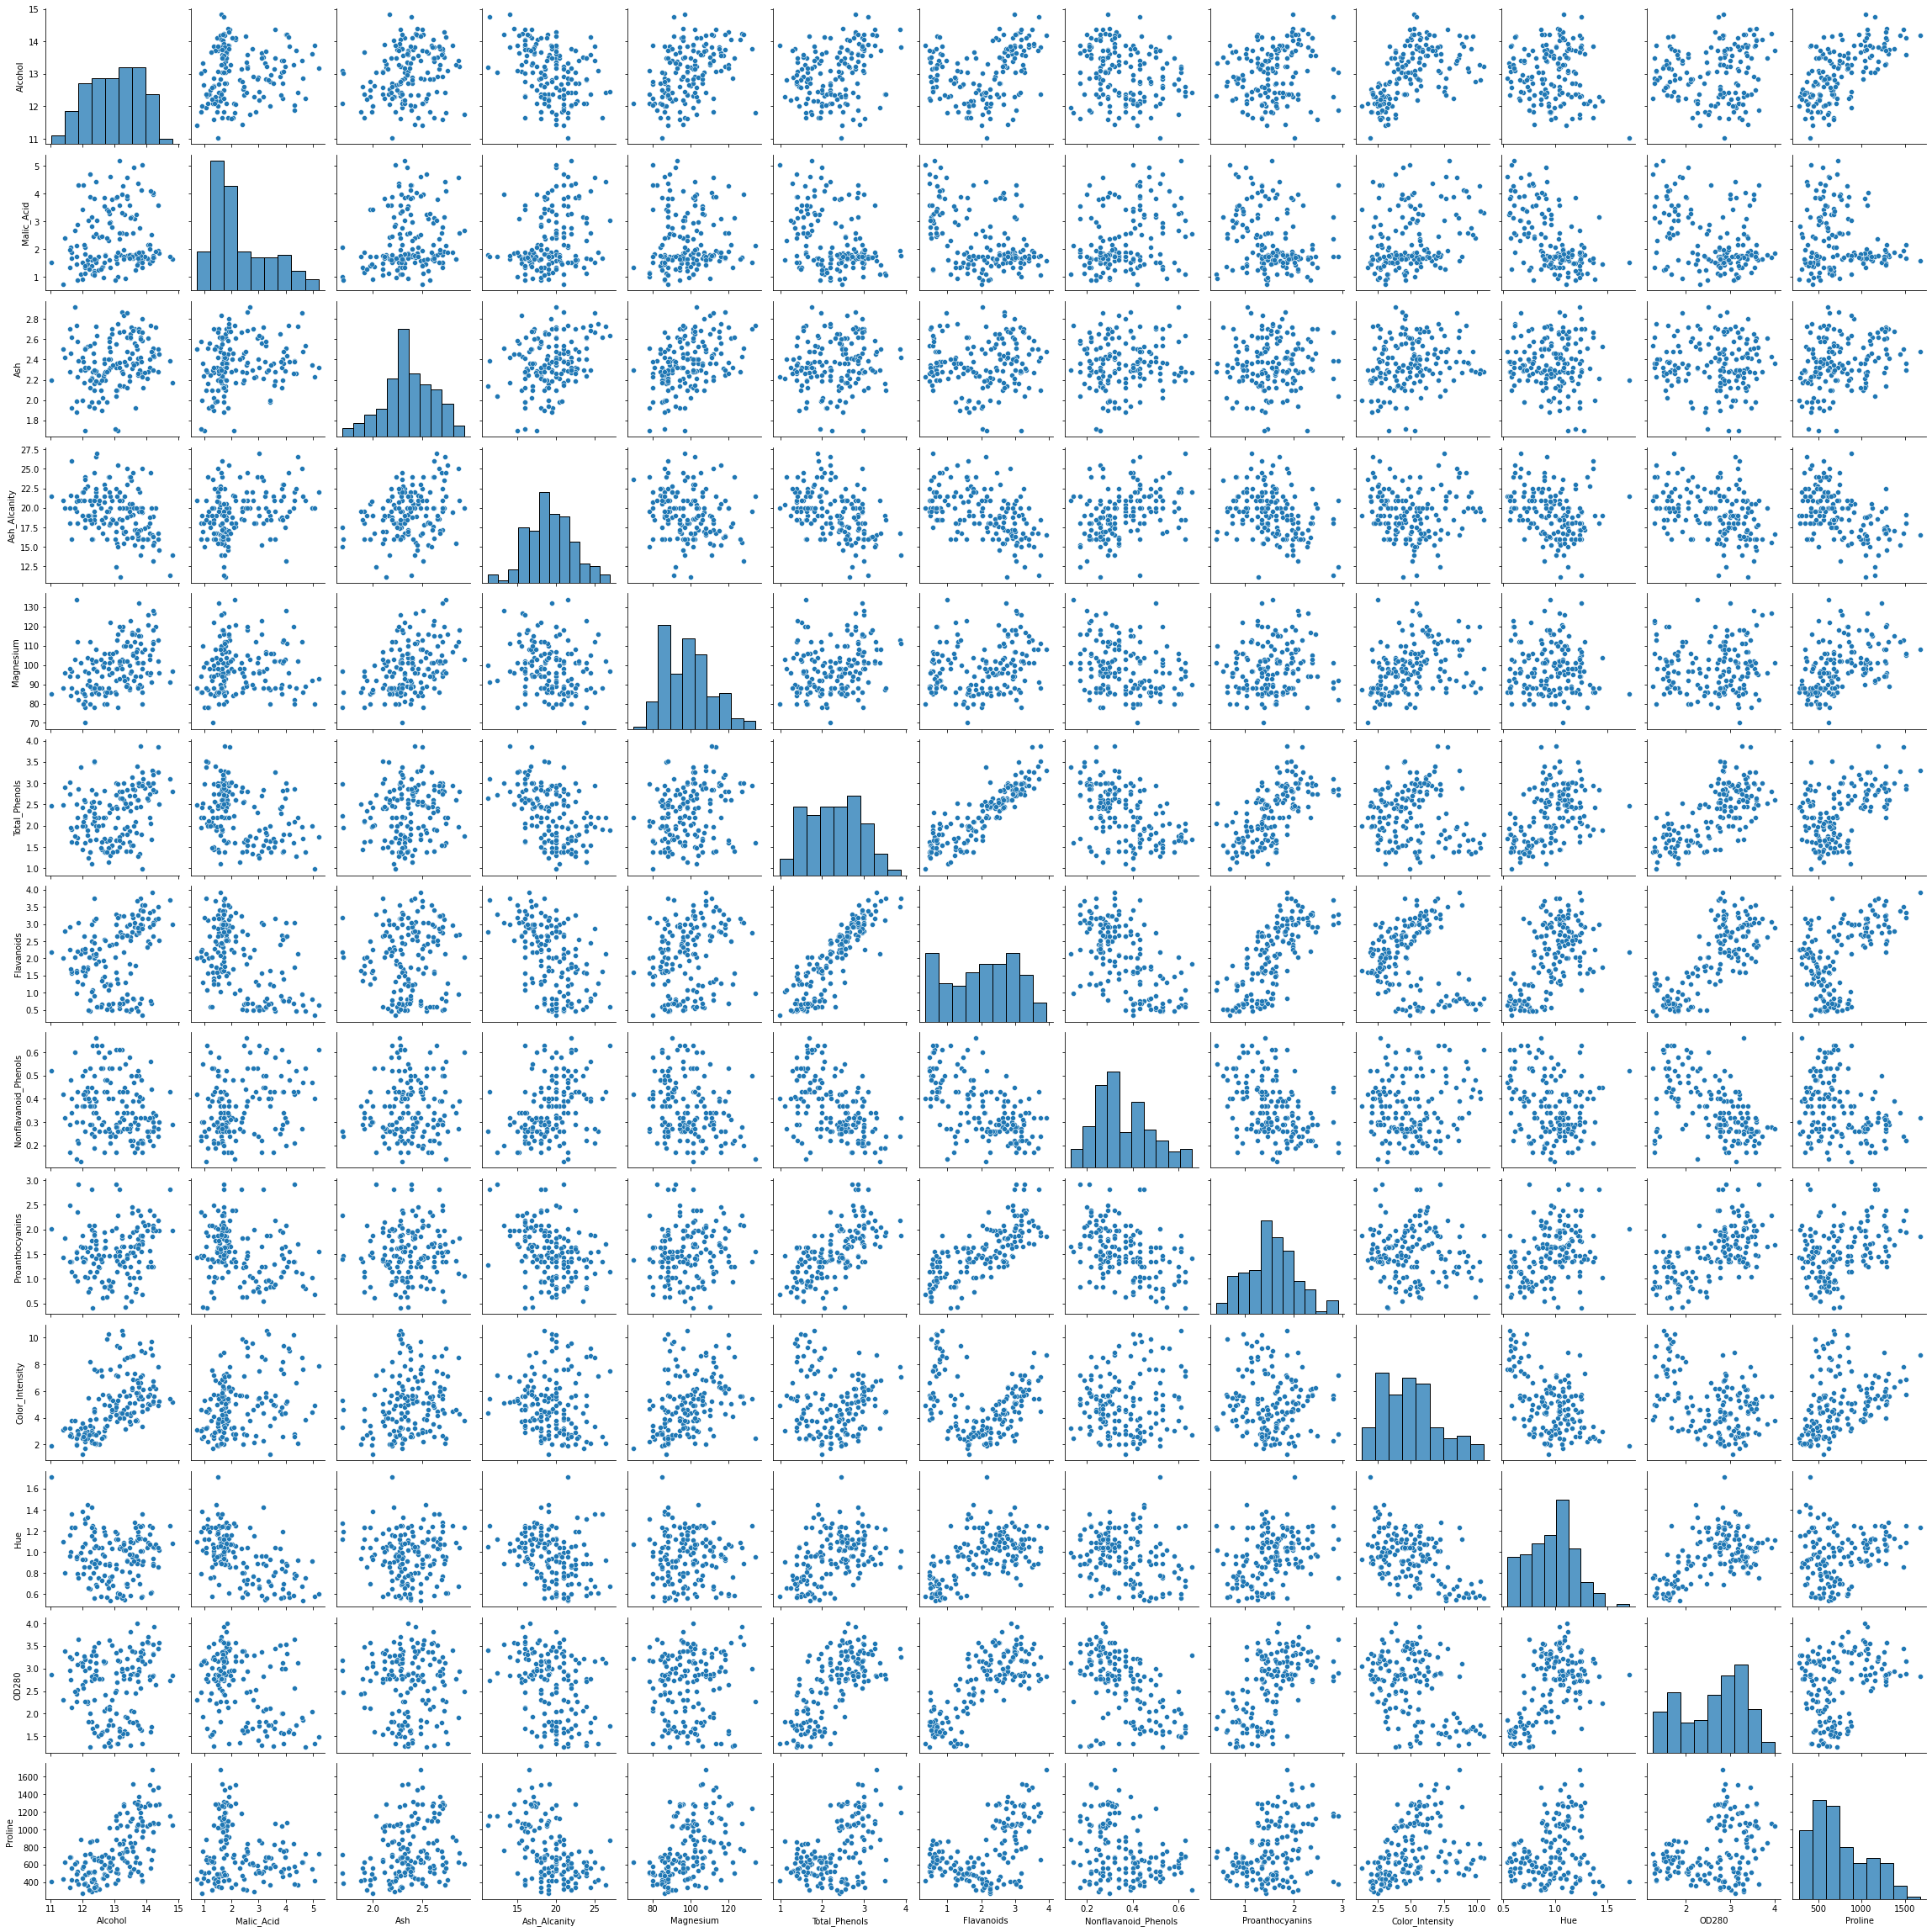

In [58]:
sns.pairplot(wn)

## 2. Try out different clustering models in the wine dataset

### a) KMeans Clustering

In [59]:
from sklearn.cluster import KMeans
model_k = KMeans(n_clusters=3)
model_k.fit(wn)
labels_k =model_k.predict(wn)   
print(labels_k)

[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1
 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 0 2 2 0 0 2 2 0 2 2 2 2
 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0 2 0 2 0 2 2 2 0 2 2 2 2 0 2 0 2 2 2 2 2 2
 2 0 2 2 2 2 2 2 0 2 2 0 0 0 0 2 0 0 0 2 2 0 0 2 0 0 2 2 2 0 0 0 2 0 2 0 2
 0 0 2 0 0 0 2 2 0 0 0 0 2]


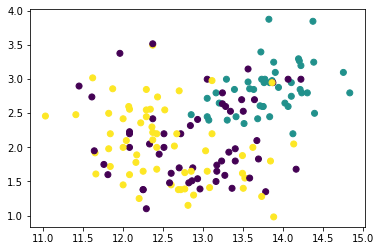

In [60]:
x= wn['Alcohol']
y= wn['Total_Phenols']
plt.scatter(x,y, c=labels_k);

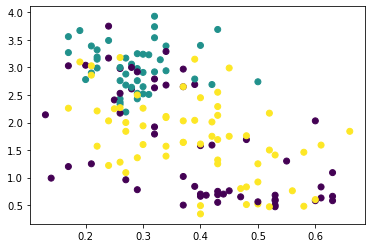

In [61]:
x= wn['Nonflavanoid_Phenols']
y= wn['Flavanoids']
plt.scatter(x,y, c=labels_k);

In [62]:
from sklearn.metrics  import silhouette_score
score=silhouette_score(wn, labels_k, metric='euclidean')
print("silhouette score for KMC is :", score)
print('Silhouette Score: %.4f' % score)

silhouette score for KMC is : 0.575680641857314
Silhouette Score: 0.5757


### b) Agglomerative Hierarchical Clustering 

In [63]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters= 3, affinity = 'euclidean', linkage = 'ward')
labels_a=agg.fit_predict(wn)
print(labels_a)

[0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 2 0 0 2 0 0 0 0 0 0 2 2 0 0
 2 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 1 1 2 2 1 1 2 1 1 1 1
 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 2 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 2 1 1 2 2 1 1 2 1 1 1 2 1 2 1 2 1 2 1
 2 1 1 2 2 1 1 1 2 2 2 2 1]


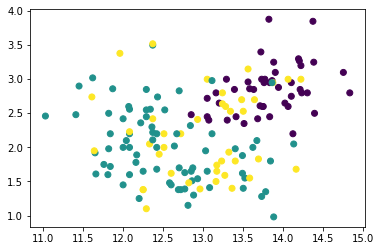

In [64]:
x= wn['Alcohol']
y= wn['Total_Phenols']
plt.scatter(x,y, c=labels_a);

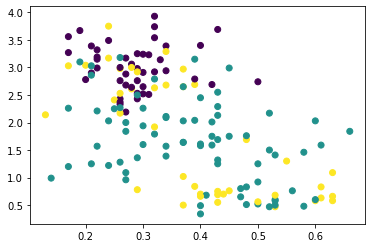

In [65]:
x= wn['Nonflavanoid_Phenols']
y= wn['Flavanoids']
plt.scatter(x,y, c=labels_a);

In [66]:
from sklearn.metrics  import silhouette_score
score=silhouette_score(wn, labels_a, metric='euclidean')
print("silhouette score for AHC is :", score)
print('Silhouette Score: %.4f' % score)

silhouette score for AHC is : 0.5403758078977825
Silhouette Score: 0.5404


### Findings:

 - from the two graphs of each clustering method, the datas are clustered into three.
 - silhouette score for both clustering method are different eventhough clusters are taken as 3. 
   It would be good if the score is close to 1.

 - silhouette score for KMC model = 0.5757

 - silhouette score for AHC model = 0.5404

## 3. Find the optimum number of clusters in each model and create the model with the optimum number of clusters.

### a) K means clustering 

16304860.181337487
4047174.9607524653
2093217.952648298
1196947.8581234417
798269.2563182872
567791.6069974047
360558.24010316643


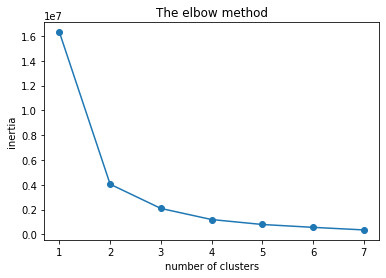

In [67]:
#by using elbow method we can find optimum number of clusters for KMC
inertia=[]
for k in range (1,8):
    model = KMeans(n_clusters=k)
    model.fit(wn)
    inertia.append(model.inertia_)
    print(model.inertia_)
plt.plot(range(1,8),inertia,'-o')
plt.title('The elbow method')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

optimum no. of clusters by elbow method is found to be 3.

In [68]:
from sklearn.cluster import KMeans
model_k = KMeans(n_clusters=3)
model_k.fit(wn)
labels_k =model_k.predict(wn)   
print(labels_k)

[1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 2 1 1 2 1 1 1 1 1 1 2 2 1 1
 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 2 0 0 2 2 0 0 2 0 0 0 0
 0 2 2 0 0 0 0 0 2 2 0 0 0 0 0 2 0 2 0 2 0 0 0 2 0 0 0 0 2 0 2 0 0 0 0 0 0
 0 2 0 0 0 0 0 0 2 0 0 2 2 2 2 0 2 2 2 0 0 2 2 0 2 2 0 0 0 2 2 2 0 2 0 2 0
 2 2 0 2 2 2 0 0 2 2 2 2 0]


In [69]:
from sklearn.metrics  import silhouette_score
score=silhouette_score(wn, labels_k, metric='euclidean')
print('Silhouette Score for KMC: %.4f' % score)

Silhouette Score for KMC: 0.5757


### b) Agglomeric hierarchial Clustering

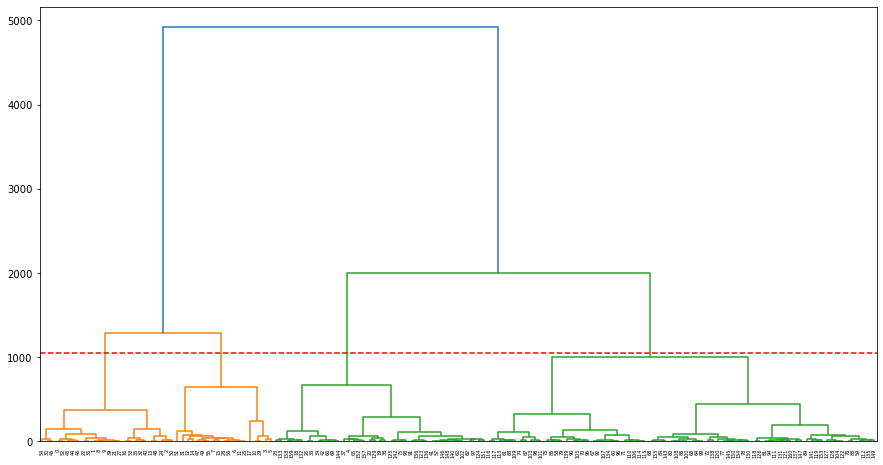

In [70]:
#approach 1
from scipy.cluster.hierarchy import dendrogram,linkage
linked = linkage(wn, method='ward')
plt.figure(figsize=(15,8))
dendrogram(linked,orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.hlines(1050,0,5000, colors='r', linestyles='dashed')
plt.show()

In [71]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4 , affinity = 'euclidean', linkage = 'ward')
labels_a=cluster.fit_predict(wn)
labels_a

array([3, 3, 3, 1, 2, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 3, 1, 2, 2, 2, 3,
       3, 2, 3, 1, 2, 3, 1, 1, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 3,
       3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0,
       2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0,
       0, 0, 2, 2, 2, 2, 0], dtype=int64)

In [72]:
from sklearn.metrics  import silhouette_score
score1=silhouette_score(wn, labels_a, metric='euclidean')
score1

0.5432309249653566

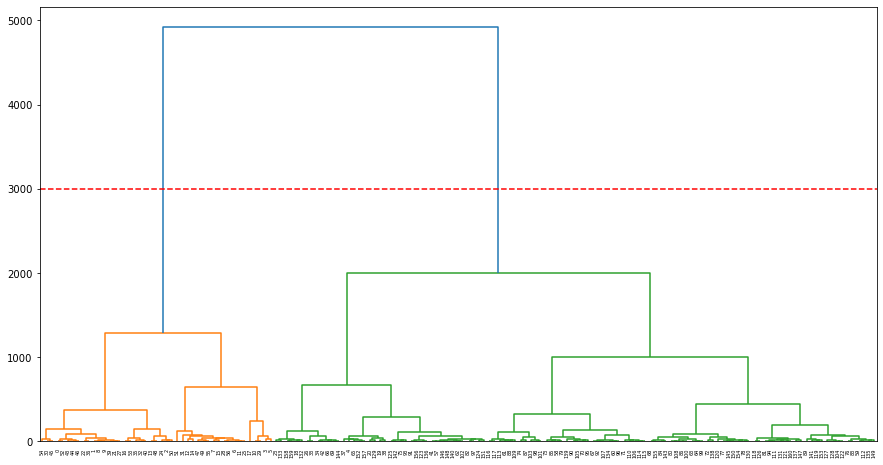

In [73]:
#approach 2 
from scipy.cluster.hierarchy import dendrogram,linkage
linked = linkage(wn, method='ward')
plt.figure(figsize=(15,8))
dendrogram(linked,orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.hlines(3000,0,5000, colors='r', linestyles='dashed')
plt.show()

In [74]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2 , affinity = 'euclidean', linkage = 'ward')
labels_a=cluster.fit_predict(wn)
labels_a

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [75]:
from sklearn.metrics  import silhouette_score
score2=silhouette_score(wn, labels_a, metric='euclidean')
score2

0.6621645020910184

In [76]:
print('Silhouette Score in approach 1: %.4f' % score1)
print('Silhouette Score in approach 2: %.4f' % score2)

Silhouette Score in approach 1: 0.5432
Silhouette Score in approach 2: 0.6622


### Findings:

 - K-Means clustering model with 3 clusters has silhouette score = 0.5756
 - silhouette score for AHC model;
    - with 3 clusters  = 0.5403
    - approach 1 (with 4 clusters) = 0.5432
    - approach 2 (with 2 clusters) = 0.6622

## scaling of data

### i) Standard scaling

In [77]:
from sklearn import preprocessing
standardisation = preprocessing.StandardScaler()
scaled_data = standardisation.fit_transform(wn)  

### a) K-Means clustering

2093.0
1463.6793307967798
1084.065726945182
1003.0773339867486
942.0248574419611
893.3539850261952
847.1504072361945


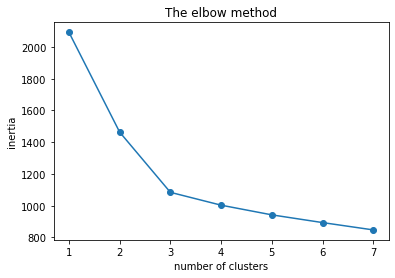

In [78]:
inertia=[]
for k in range (1,8):
    model = KMeans(n_clusters=k)
    model.fit(scaled_data)
    inertia.append(model.inertia_)
    print(model.inertia_)
plt.plot(range(1,8),inertia,'-o')
plt.title('The elbow method')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

In [79]:
from sklearn.cluster import KMeans
model_k = KMeans(n_clusters=3)
model_k.fit(scaled_data)
labels_k =model_k.predict(scaled_data)   
print(labels_k)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [80]:
from sklearn.metrics  import silhouette_score
score=silhouette_score(scaled_data, labels_k, metric='euclidean')
print("silhouette score for KMC is :", score)
print('Silhouette Score: %.4f' % score)

silhouette score for KMC is : 0.3007761711143658
Silhouette Score: 0.3008


### Findings:

Silhouette score for K Means clustering is 0.3008

### b) AHC

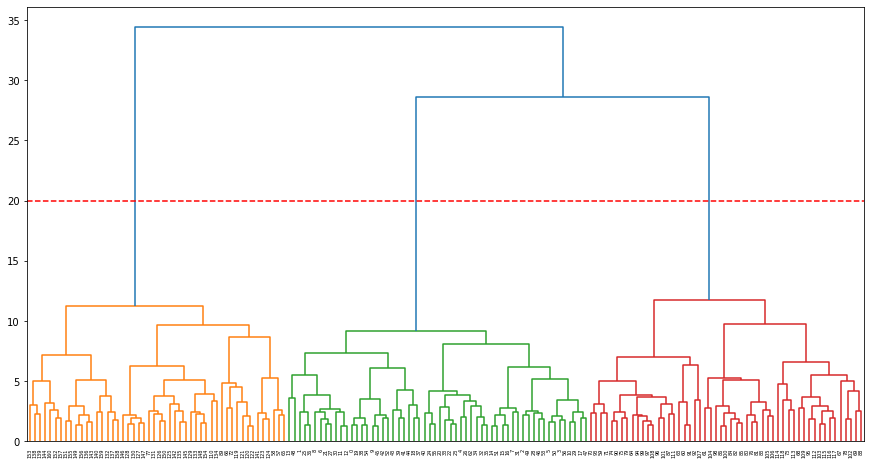

In [81]:
from scipy.cluster.hierarchy import dendrogram,linkage
linked = linkage(scaled_data, method='ward')
plt.figure(figsize=(15,8))
dendrogram(linked,orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.hlines(20,0,5000, colors='r', linestyles='dashed')
plt.show()

In [82]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3 , affinity = 'euclidean', linkage = 'ward')
labels_a=cluster.fit_predict(scaled_data)
labels_a

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 2, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [83]:
from sklearn.metrics  import silhouette_score
score=silhouette_score(scaled_data, labels_a, metric='euclidean')
print('Silhouette Score: %.4f' % score)

Silhouette Score: 0.2978


### Findings:

silhouette score is 0.2978 after standardising in AHC model.

## Principal component analysis (PCA)

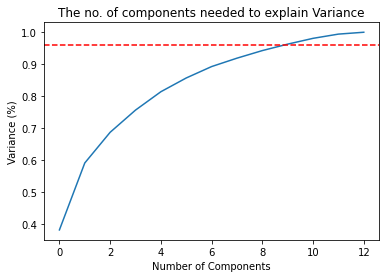

In [84]:
from sklearn.decomposition import PCA
pca = PCA().fit(scaled_data)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Number of Components', fontsize = 10)
plt.ylabel('Variance (%)', fontsize = 10) 
plt.title('The no. of components needed to explain Variance', fontsize = 12)

plt.axhline(y=0.96, color='r', linestyle='dashed')
plt.show()

In [85]:
pca = PCA(n_components = 9)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_pca.shape

(161, 9)

In [86]:
# displaying the PCA components
pca.components_

array([[-0.17315068,  0.23452606, -0.01578545,  0.27410875, -0.13237894,
        -0.3938391 , -0.42596497,  0.29276753, -0.32692447,  0.05494165,
        -0.27646042, -0.36279255, -0.28616811],
       [-0.44875376, -0.25202499, -0.29824509,  0.05285261, -0.38711313,
        -0.02465207,  0.03614635, -0.00804443,  0.02041446, -0.50724237,
         0.28501107,  0.18304117, -0.34507594],
       [-0.16629632,  0.07820409,  0.71165043,  0.54908235,  0.19054343,
         0.10025074,  0.07044415,  0.07425632,  0.09298249, -0.22408905,
         0.14401967,  0.13416916, -0.06207929],
       [-0.01705146,  0.55331324, -0.13736758,  0.17188023, -0.27760807,
         0.13812441,  0.12500363, -0.26700183,  0.44279416,  0.05645545,
        -0.42153601,  0.19367683, -0.21822773],
       [-0.20768085, -0.06266799, -0.07647362,  0.00157019,  0.53652677,
        -0.11627268, -0.06534146, -0.70386524, -0.23754278, -0.13790353,
        -0.19405918, -0.01398877, -0.18087568],
       [-0.15240508, -0.625280

### a) K means clustering

16304860.181337487
4046232.0855122874
2093217.952648298
1202400.507399638
798269.2563182872
567791.6069974047
360558.24010316643


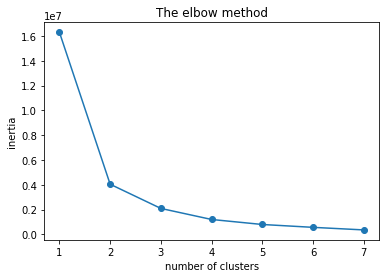

In [87]:
inertia=[]
for k in range (1,8):
    model = KMeans(n_clusters=k)
    model.fit(wn)
    inertia.append(model.inertia_)
    print(model.inertia_)
plt.plot(range(1,8),inertia,'-o')
plt.title('The elbow method')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

In [88]:
from sklearn.cluster import KMeans
model_k = KMeans(n_clusters=3)
model_k.fit(x_pca)
labels_k =model_k.predict(x_pca)   
print(labels_k)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [89]:
from sklearn.metrics  import silhouette_score
score=silhouette_score(x_pca, labels_k, metric='euclidean')
print('Silhouette Score: %.4f' % score)

Silhouette Score: 0.3227


### b)Agglomeric hierarchial Clustering

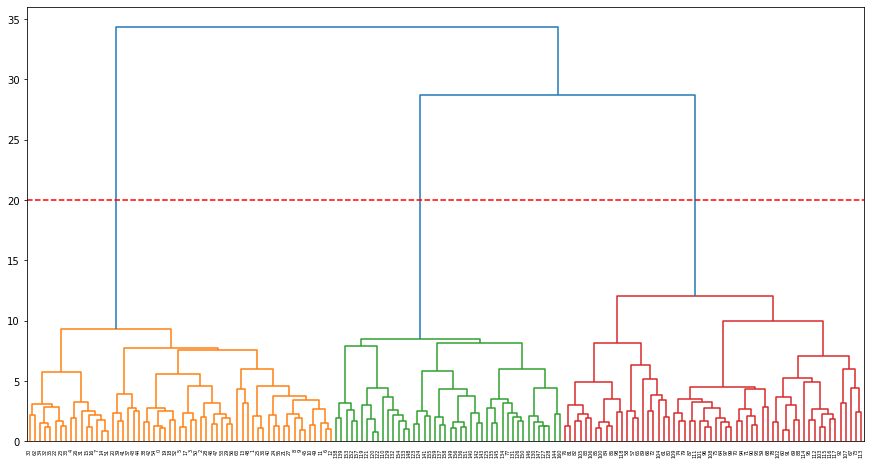

In [90]:
from scipy.cluster.hierarchy import dendrogram,linkage
linked = linkage(x_pca, method='ward')
plt.figure(figsize=(15,8))
dendrogram(linked,orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.hlines(20,0,5000, colors='r', linestyles='dashed')
plt.show()

In [91]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3 , affinity = 'euclidean', linkage = 'ward')
labels_a=cluster.fit_predict(x_pca)
labels_a

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [92]:
from sklearn.metrics  import silhouette_score
score=silhouette_score(x_pca, labels_a, metric='euclidean')
print('Silhouette Score: %.4f' % score)

Silhouette Score: 0.3194


### Findings:

Silhouette score after pca for two models is as follows;

a) K-Means Clustering = 0.3227

b) Agglomeric hierarchial clustering = 0.3194

## Final Findings: 

In [96]:
data = ({'silhouette score': [0.5757,0.3008, 0.3227,0.6622,0.5404,0.5432,0.2978, 0.3194]})
df = pd.DataFrame(data, index =['KMC  (with 3 clusters)' , 'KMC (after standisation)', 'KMC (after PCA)', 'AHC (with 2 clusters)', 'AHC (with 3 clusters)','AHC (with 4 clusters)', 'AHC (after standardisation)', 'AHC (after PCA)'])
df

,silhouette score
KMC (with 3 clusters),0.5757
KMC (after standisation),0.3008
KMC (after PCA),0.3227
AHC (with 2 clusters),0.6622
AHC (with 3 clusters),0.5404
AHC (with 4 clusters),0.5432
AHC (after standardisation),0.2978
AHC (after PCA),0.3194


#### So from above data, Agglomeric hierarchial clustering with two clusters having silhouette score of 0.6622  makes best model. 

In [98]:
#building our model
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters= 2, affinity = 'euclidean', linkage = 'ward')
labels_a=agg.fit_predict(wn)
print(labels_a)

[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1
 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [99]:
from sklearn.metrics  import silhouette_score
score=silhouette_score(wn, labels_a, metric='euclidean')
print('Silhouette Score: %.4f' % score)

Silhouette Score: 0.6622


##### SRUTHY B (DSA-B3)